In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import utm

%matplotlib inline

In [2]:
filename = '/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/bathymetry/Salish Sea 25m Grid.txt'
!head /ocean/sallen/allen/research/MEOPAR/NEMO-forcing/bathymetry/Salish\ Sea\ 25m\ Grid.txt

In [3]:
mydata = pd.read_csv(filename, header=None, names=['x','y','depth'])
mydata[0:15]

,x,y,depth
0,451425.0,5342645.0,164.593
1,451450.0,5342645.0,164.953
2,451475.0,5342645.0,165.782
3,451500.0,5342645.0,165.901
4,451325.0,5342670.0,162.446
5,451350.0,5342670.0,162.775
6,451375.0,5342670.0,162.745
7,451400.0,5342670.0,163.344
8,451425.0,5342670.0,164.193
9,451450.0,5342670.0,164.603


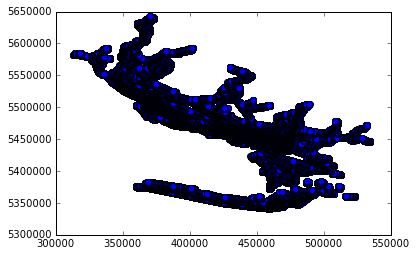

In [22]:
plt.plot(mydata.x, mydata.y, 'o')

In [9]:
lats = np.zeros(len(mydata))
lons = np.zeros(len(mydata))
for i in range(len(mydata)):
    lats[i], lons[i] = utm.to_latlon(mydata.x[i], mydata.y[i], 10, northern=True)


In [18]:
file = open('latlondepth', 'wb')

In [19]:
pickle.dump([lats, lons, mydata.depth], file, protocol=None, fix_imports=True)

In [20]:
print (lats[0], lons[0], mydata.x[0], mydata.y[0])

48.23516311 -123.65415872 451425.0 5342645.0


In [37]:
tot = len(mydata)
newlat = []
newlon = []
newdep = []
print (tot)
print (mydata.depth[5])

13108913
162.775


In [38]:
for i in range(tot):
    if lats[i] < 49.2 and lats[i] > 49 and lons[i] < -123.4 and lons[i] > -123.6:
        newlat.append(lats[i])
        newlon.append(lons[i])
        newdep.append(mydata.depth[i])

In [39]:
len(newdep)

375961

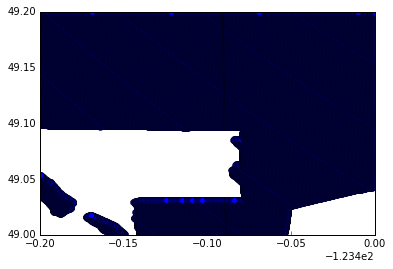

In [41]:
plt.plot(newlon, newlat, 'o')